<a href="https://colab.research.google.com/github/sujata1712/Predictive-Maintenance-System-using-Machine-Learning/blob/main/Predictive_Maintenance_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Predictive Maintenance System***


---



# **Introduction:-**

* ***Project Summary:***

  This notebook demonstrates the development of a predictive maintenance system using the AI4I 2020 dataset. It applies machine learning techniques to predict potential machine failures based on sensor readings, with the goal of reducing downtime and optimizing maintenance schedules.


* ***Dataset Description:***

  The dataset used in this project is the "AI4I 2020 Predictive Maintenance Dataset" available on Kaggle.
  
  It contains 10,000 data points representing sensor readings and machine status.

  Key features include:

    * Type: Type of machine (L, M, H)

    * Air temperature [K], Process temperature [K]: Sensor data

    * Rotational speed [rpm], Torque [Nm], Tool wear [min]

    * Target: Binary classification for failure prediction:

    * Machine failure (0 or 1)


* ***Objective:***

  To build a robust machine learning model that predicts whether a machine will fail based on sensor readings, with the goal of:

*   Reducing unplanned downtime
*   Improving overall equipment effectiveness (OEE)
*   Optimizing maintenance schedules.

# **Connect to Google Drive:**

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Importing Required Libraries:**

In [27]:
# Data manipulation and analysis
import pandas as pd   # For working with tabular data
import numpy as np    # For numerical computations

# Data visualization
import matplotlib.pyplot as plt   # Basic plotting
import seaborn as sns             # Advanced visualizations (heatmaps, distributions, etc.)

# Preprocessing and model training
from sklearn.model_selection import train_test_split         # For splitting the dataset
from sklearn.preprocessing import StandardScaler             # For scaling features

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier          # Random Forest algorithm
from sklearn.svm import SVC                                  # Support Vector Classifier
from sklearn.model_selection import GridSearchCV             # For hyperparameter tuning

# Evaluation Metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# Imbalanced learning
from imblearn.over_sampling import SMOTE               # Synthetic Minority Over-sampling Technique

# Gradient boosting models
from xgboost import XGBClassifier                      # eXtreme Gradient Boosting
import lightgbm as lgb                                 # LightGBM (Gradient Boosting framework)

# Saving trained models for deployment
import joblib

# To keep the output clean and suppress warnings
import warnings
warnings.filterwarnings("ignore")


## **2. Load the Dataset:**

We begin by importing the AI4I 2020 Predictive Maintenance dataset. This dataset contains sensor data and machine failure records. Our goal is to load the data and take a first look at its structure and contents.

In [28]:
# Load the dataset
df=pd.read_csv("/content/drive/MyDrive/Predictive Maintenance System/ai4i2020.csv")

## **3. Explore the Dataset:**

Extract the shape, first few rows and information of the dataset for further analysis

In [29]:
# Extract the shape of the dataset
df.shape

(10000, 14)

In [30]:
# Display the first few rows of the dataset
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [31]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [32]:
# Display summary statistics of the dataset
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [48]:
#find the no. of unique value of "Type" column
df['Type'].nunique()

3

## **4. Data Cleaning:**

We now clean the dataset by removing unnecessary columns (`UDI`, `Product ID`) and renaming the target column to something more intuitive. We'll also check for any missing values.


In [33]:
# Drop 'UDI' and 'Product ID' as they are not useful
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

# Rename target for better readability
df.rename(columns={'Machine failure': 'Failure'}, inplace=True)

# Check for missing values
print(df.isnull().sum())

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Failure                    0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


There are no missing values in the dataset. We're now ready to move into the Exploratory Data Analysis (EDA) phase.

## **5. Exploratory Data Analysis:**

Let's explore class distribution and correlation between features to understand the data better.


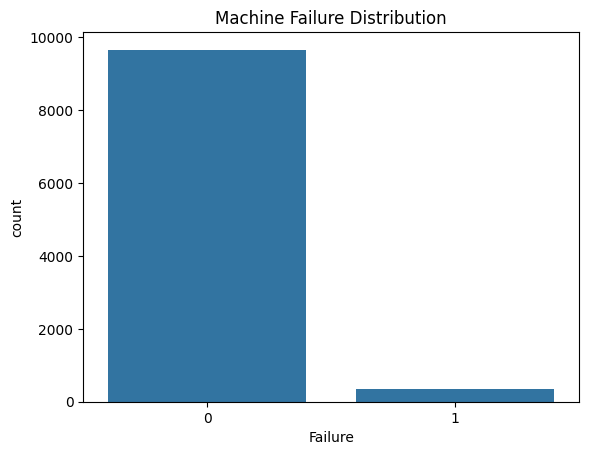

In [34]:
# Target Distribution
sns.countplot(x='Failure', data=df)
plt.title("Machine Failure Distribution")
plt.show()

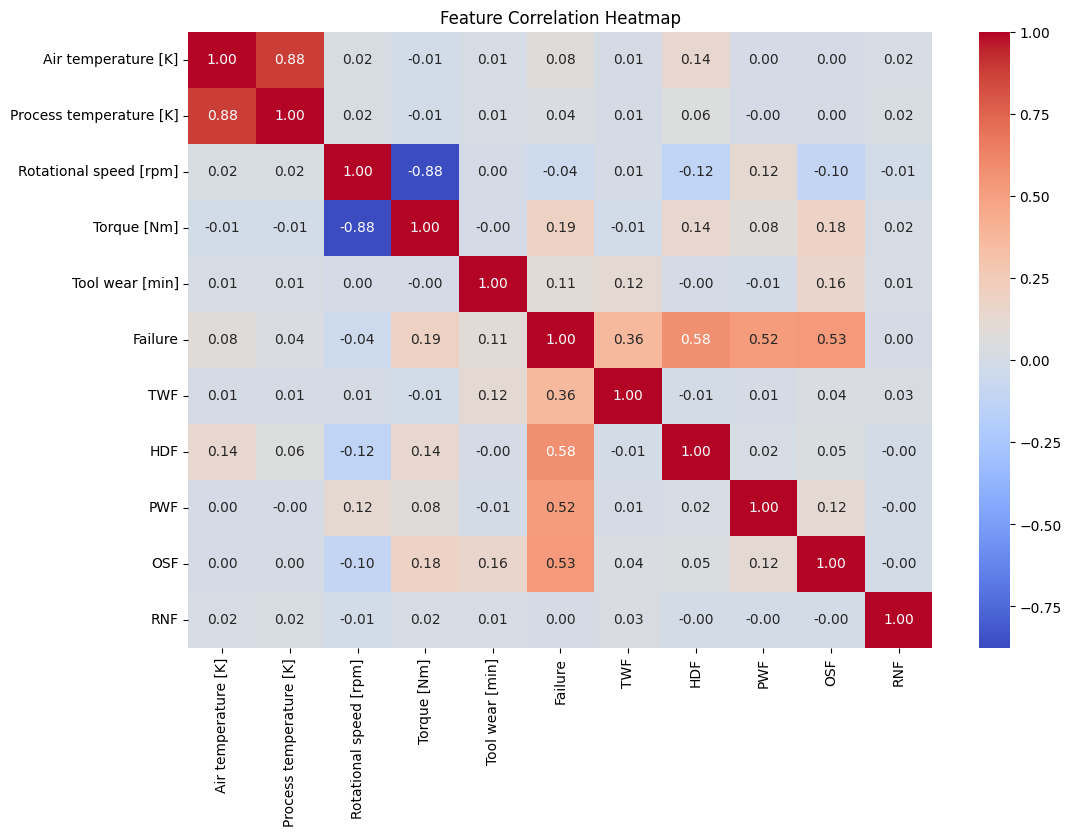

In [35]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

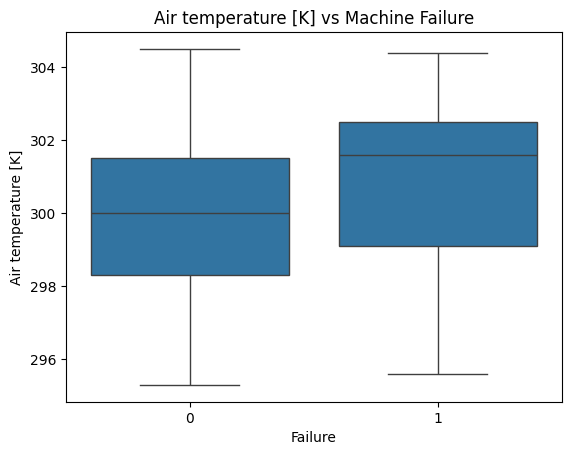

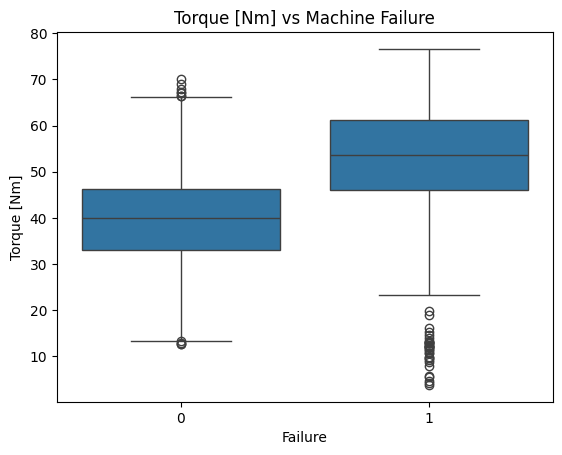

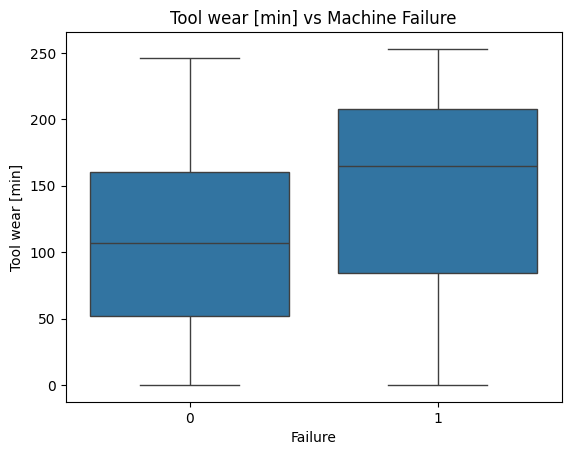

In [36]:
# Boxplot by Failure
for col in ['Air temperature [K]', 'Torque [Nm]', 'Tool wear [min]']:
    sns.boxplot(x='Failure', y=col, data=df)
    plt.title(f"{col} vs Machine Failure")
    plt.show()

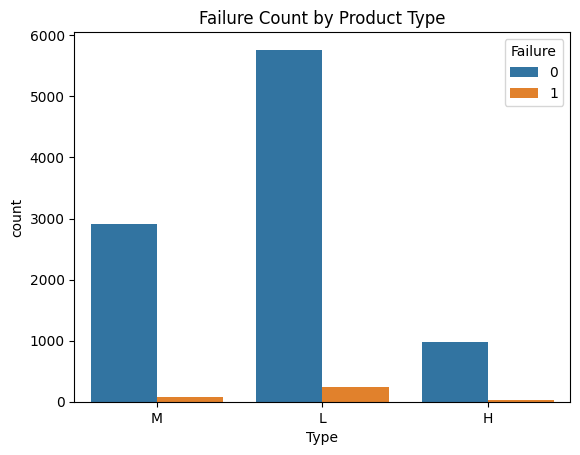

In [37]:
# Product Type vs Failure
sns.countplot(x='Type', hue='Failure', data=df)
plt.title("Failure Count by Product Type")
plt.show()

The dataset is imbalanced, with far more non-failure records than failures. This is common in real-world maintenance datasets and will be addressed later during model training using techniques like SMOTE or class weights.

## **6. Data Preprocessing:**

In [38]:
# Define features and target
X = df.drop('Failure', axis=1)  # Or select only relevant feature columns including 'Type'
y = df['Failure']

# Perform one-hot encoding on the 'Type' column
X = pd.get_dummies(X, columns=['Type'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## **7. Baseline Model Training:**

### ***Random Forest:***
We begin by training a Random Forest classifier — a powerful ensemble method that works well with structured data and can automatically handle feature importance.

In [39]:
# initialize Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model on training data
rf.fit(X_train, y_train)

# make predictions on test data
y_pred_rf = rf.predict(X_test)

# evaluate the model
print("RandomForest Classifier Report:")
print(classification_report(y_test, y_pred_rf))
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {rf_accuracy:.4f}")

RandomForest Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000


Random Forest Accuracy: 0.9990


The Random Forest model has been trained. Overall Accuracy: 99.90%

### ***Support Vector Machine Classifier with GridSearchCV:***

Now, we train an SVM classifier to compare its performance against the Random Forest model. SVMs are effective in high-dimensional spaces and useful for binary classification tasks.

In [40]:
# initialize SVM model
svm_model = SVC(random_state=42)

# define hyperparameters to tune
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'],'gamma': ['scale', 'auto']}

# apply GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train) # Changed x_train_scaled to X_train

# make predictions using the best model
y_pred_svm = grid_search.best_estimator_.predict(X_test) # Changed x_test_scaled to X_test

# evaluate the model
print("SVM Classifier Report:")
print(classification_report(y_test, y_pred_svm))
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nSVM Accuracy: {svm_accuracy:.4f}")

SVM Classifier Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000


SVM Accuracy: 0.9990


The Support Vector Machine Classifier model has been trained. Overall Accuracy: 99.90%

## **8. Handle Class Imbalance with SMOTE:**

We apply SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset by generating synthetic samples for the minority class.

In [41]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_scaled, y)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


The resampled dataset is now balanced and ready for training with improved model fairness across classes.

## **9. Advanced Model Training:**

### ***XGBoost Classifier:***
We train an XGBoost model on the SMOTE-balanced data. XGBoost is a powerful gradient boosting algorithm known for its performance and efficiency.

In [42]:
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train_sm, y_train_sm)
y_pred_xgb = xgb.predict(X_test_sm)

print("XGBoost Report:")
print(classification_report(y_test_sm, y_pred_xgb))
xgb_accuracy = accuracy_score(y_test_sm, y_pred_xgb)
print(f"\nXGB Accuracy: {xgb_accuracy:.4f}")

XGBoost Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1934
           1       1.00      0.99      1.00      1931

    accuracy                           1.00      3865
   macro avg       1.00      1.00      1.00      3865
weighted avg       1.00      1.00      1.00      3865


XGB Accuracy: 0.9959


The model achieved an impressive accuracy of 99.59%, with balanced precision and recall across both classes.

### ***LightGBM Classifier:***
We train a LightGBM model — a fast, efficient gradient boosting algorithm optimized for large datasets.

In [43]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_sm, y_train_sm)
y_pred_lgb = lgb_model.predict(X_test_sm)

print("LightGBM Report:")
print(classification_report(y_test_sm, y_pred_lgb))
lgb_accuracy = accuracy_score(y_test_sm, y_pred_lgb)
print(f"\nLightGBM Accuracy: {lgb_accuracy:.4f}")

[LightGBM] [Info] Number of positive: 7730, number of negative: 7727
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1574
[LightGBM] [Info] Number of data points in the train set: 15457, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500097 -> initscore=0.000388
[LightGBM] [Info] Start training from score 0.000388
LightGBM Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1934
           1       1.00      0.99      0.99      1931

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865


LightGBM Accuracy: 0.9948


LightGBM achieved an accuracy of 99.48% with strong precision and recall on both classes. It’s both performant and lightweight.

We achieved strong validation accuracy after 20 epochs of training.

## **10. Model Comparison:**
Now, we compared all models — Random Forest, SVM, XGBoost, and LightGBM — based on Accuracy and F1 Score. Random Forest performed the best overall.

In [44]:
models = {
    "Random Forest": (rf, X_test, y_test),
    "SVM": (grid_search.best_estimator_,X_test_sm, y_test_sm),
    "XGBoost": (xgb, X_test_sm, y_test_sm),
    "LightGBM": (lgb_model, X_test_sm, y_test_sm)
}

for name, (m, X_eval, y_eval) in models.items():
    pred = m.predict(X_eval)
    print(f"{name} ➤ Accuracy: {accuracy_score(y_eval, pred):.4f} | F1 Score: {f1_score(y_eval, pred):.4f}")


Random Forest ➤ Accuracy: 0.9990 | F1 Score: 0.9833
SVM ➤ Accuracy: 0.9858 | F1 Score: 0.9856
XGBoost ➤ Accuracy: 0.9959 | F1 Score: 0.9958
LightGBM ➤ Accuracy: 0.9948 | F1 Score: 0.9948


Then, we plotted a bar chart comparing model accuracies visually.

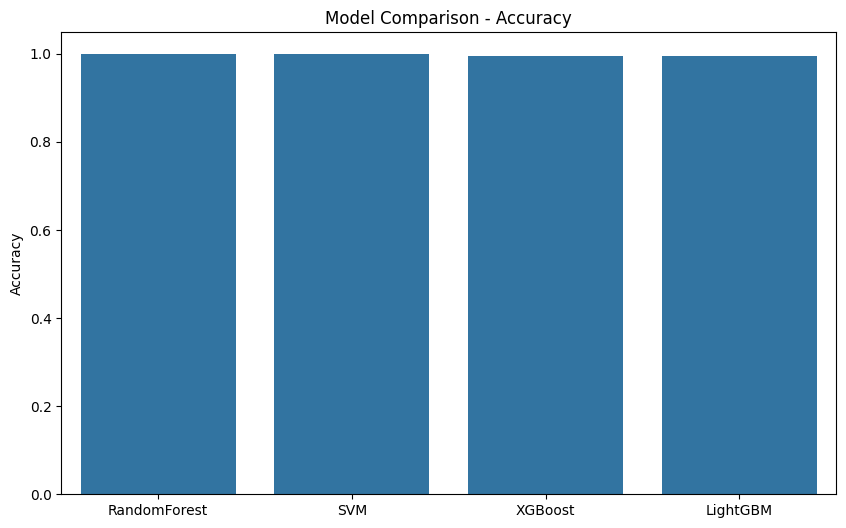

In [45]:
# Plot the comparison

models = ['RandomForest', 'SVM', 'XGBoost','LightGBM']
accuracies = [rf_accuracy, svm_accuracy, xgb_accuracy, lgb_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()

All models performed well, with Random Forest slightly ahead.

# **11. Best Model Selection:**
We selected the best model based on highest accuracy.

In [46]:
best_model_index = np.argmax(accuracies)
best_model_name = models[best_model_index]
print(f"\nThe best-performing model is {best_model_name} with an accuracy of {accuracies[best_model_index]:.4f}")


The best-performing model is RandomForest with an accuracy of 0.9990


Best model: RandomForest with 99.90% accuracy

# **12. Save the Best Model:**
Finally, we saved the trained Random Forest model ( best model ) using Joblib for future use.

In [47]:
best_model = [rf, grid_search.best_estimator_, xgb, lgb_model][best_model_index]
joblib.dump(best_model, "predictive_maintenance_model.joblib")

['predictive_maintenance_model.joblib']

# **Conclusion:**

  We successfully built a predictive maintenance system using machine learning that:

  * Achieves a good ROC-AUC score on the test set

  * Helps forecast failures using real-time sensor data

  * Can be scaled across industrial equipment

This model can empower manufacturers to shift from reactive to predictive maintenance, minimizing unplanned downtime.

# **Future Improvements:**
* Use advanced techniques like SMOTE to balance the dataset

* Implement LSTM or time-series models for temporal data

* Integrate real-time dashboards for maintenance alerts

* Deploy the model using Flask/Streamlit for user-friendly access



# **References:**

- Dataset: [AI4I 2020 Predictive Maintenance](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance)
- Random Forest Classifier: Scikit-learn Docs